# Conical Spirals - Supports

Given a conical (Archimedean) spiral, calculate where we could place supports. We'll assume they will be at integer intervals. If the height is 5 units, we'll want a support at 1, 2, 3 and 4. The way this works, we specify the support interval delta along the height, `Z`, of the cone and it will calculate the locations and lengths of the support struts.

# Notebook Preamble

In [1]:
%%javascript
//Disable autoscroll in the output cells - needs to be in a separate cell with nothing else
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# decide whether charts will be displayed interactively or in a format that exports to pdf

# Interactive -----------------
# For interactive notebook uncomment:
%matplotlib notebook

# PDF -----------------
# For pdf plotting uncomment:
# %matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')

%config InlineBackend.figure_formats = ['png', 'pdf'] #['svg']

#------------
# Setup matplotlib
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D # handle 3D plots
import matplotlib as mpl

# uncomment the following if you have more then 40 plots
# mpl.rcParams['figure.max_open_warning'] = 60

mpl.rc('font',family='monospace') # all font on the plot will be monospace

In [3]:
import numpy as np

from plots import create_standard_figure, axis_legend_remove_duplicates

from common import (
    plot_cone, 
    plot_spiral, 
    plot_center_pole, 
    calculate_support_points, 
    spiral_arc_length_range,
    plot_cone_and_sprial,
)

# Support Points

We want to find the points on the curve that intersect specific elevations between $0$ and $h$. Our current model:

$$
\begin{equation} \tag{1}
\begin{matrix}
x(\theta) = b \theta \sin \theta \\ 
y(\theta) = b \theta \cos \theta \\ 
z(\theta) = z_0 + m \theta
\end{matrix}
\end{equation}
$$

The angles where the curve passes through specific elevations can be calculated with:

$$ 
\begin{equation} \tag{2}
\theta = \frac{z(\theta) - z_0}{m}
\end{equation}
$$

Essentially, we have to calculate the particular angles that coincide with the heights of interest. In our case, we'll simply use the integer values from $0$ to $h$.

<IPython.core.display.Javascript object>


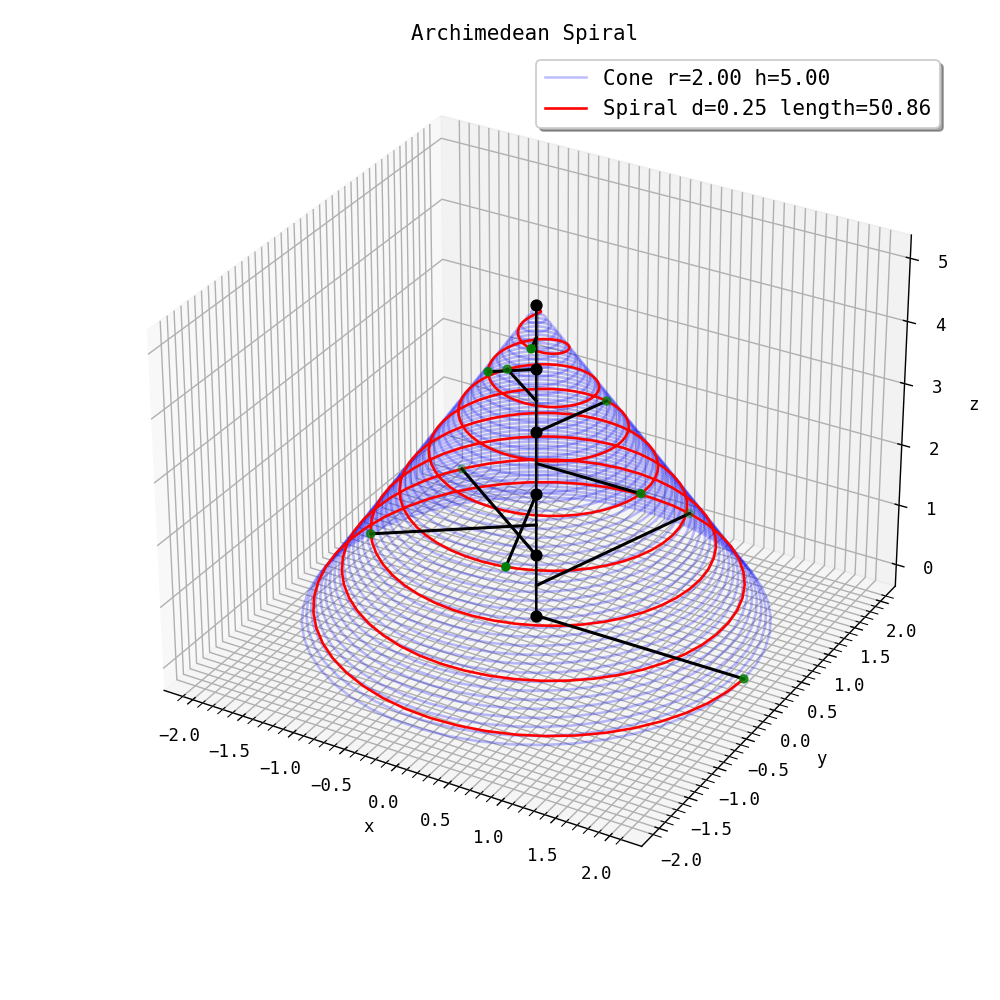

Cone Radius (r) = 2.0000
Cone Height (h) = 5.0000
Sprial Distance (d) = 0.2500
Strut Offset Height (Δh) = 0.5
------
Support Length (@ Z=0.0) = 2.00
Support Length (@ Z=0.5) = 1.80
Support Length (@ Z=1.0) = 1.60
Support Length (@ Z=1.5) = 1.40
Support Length (@ Z=2.0) = 1.20
Support Length (@ Z=2.5) = 1.00
Support Length (@ Z=3.0) = 0.80
Support Length (@ Z=3.5) = 0.60
Support Length (@ Z=4.0) = 0.40
Support Length (@ Z=4.5) = 0.20


In [5]:
fig, ax = create_standard_figure(
    'Archimedean Spiral',
    'x',
    'y',
    'z',
    projection='3d',
    figsize=(8, 8),                                                  
    axes_rect=(0.1, 0.1, 0.85, 0.85), # rect [left, bottom, width, height]
) 

# NOTE: Units are in what every system you want as long as all length units are the same (ft, m, inches, mm)

# Cone
r = 2 # m
h = 5 # m
d = 0.25 # spacing between loops

plot_cone_and_sprial(ax, r, h, d)

# --------
# Support Points

# What is the support interval along the z-axis from [0, h)?
delta_h = 0.5
print(f'Strut Offset Height (Δh) = {delta_h}')

x, y, z = calculate_support_points(r, h, d, delta_h=delta_h)

ax.scatter(x, y, z, marker='o', color='green')

# ----------
# support struts

z0 = np.arange(0.0, h, step=delta_h)
x0 = np.zeros(z0.shape)
y0 = np.zeros(z0.shape)

support_start = np.vstack([x0, y0, z0])
support_end = np.vstack([x, y, z])

# print('=====')
# print(support_start)
# print()
# print(support_end)
# print('---')

# interleave the matrices by column
full = np.empty((support_start.shape[0], support_start.shape[1]*2))
full[:, 0::2] = support_start                
full[:, 1::2] = support_end                

# print(full)
# print('-------')

print('------')
# Display the support struts and print their lengths out
for line in np.hsplit(full, full.shape[1]/2):   
    p1 = line[:,0]
    p2 = line[:,1]
    
    length = np.linalg.norm(p2 - p1)
    print(f'Support Length (@ Z={p1[2]}) = {length:.2f}')

    ax.plot(*line, '-', color='black', linewidth=1.75)
# -----------

# ax.legend(
#     handles=[cone_handle, spiral_handle],
#     labels=[f'Cone r={r:.2f} h={h:.2f}', f'Spiral d={d:.2f} length={al:.2f}'],
#     loc='best',
#     shadow=True, 
#     fancybox=True,
#     prop={'family': 'monospace', 'size':12},
#     frameon=True,
# )

# ax.view_init(elev=0, azim=45)

fig.show() 

The result is quite nice. The support points are calculated at specific `Z` values and the lengths of the support strut are calculated and plotted.

## Future

We could potentially add the model to allow use to place supports at reqular angles instead of regular elevations. For example, we could add supports at the regular angles (0, pi/2, pi, 3pi/2 + ...). This would mean that we would trace the curve and put supports on the north, east, south and west sides. This might be easier.